# Validação

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np


In [2]:
def as_radian(np_array):
    return math.atan2(np_array[1], np_array[0])

def as_vector(radian):
    return np.array([math.cos(radian), math.sin(radian)])

def near_radian(radian):
    if abs(radian) <= math.pi:
        return radian
    if radian > 0:
        return radian - 2 * math.pi
    else:
        return radian + 2 * math.pi
    
def rotate(np_array, radian):
    cos = math.cos(radian)
    sin = math.sin(radian)
    return np.array([cos * np_array[0] - sin * np_array[1], sin * np_array[0] + cos * np_array[1]])

In [3]:
assert as_radian([0,1]) == math.pi / 2
assert as_radian([1,0]) == 0
assert as_radian([-1,0]) == math.pi
assert as_radian([0,-1]) == - math.pi /2
assert np.allclose(as_vector(math.pi/2), np.array([0,1]))
assert np.allclose(as_vector(0), np.array([1,0]))
assert np.allclose(as_vector(math.pi), np.array([-1,0]))
assert np.allclose(as_vector(-math.pi/2), np.array([0,-1]))
assert np.allclose(rotate(np.array([0,1]),math.pi/2), np.array([-1,0]))
assert np.allclose(rotate(np.array([0,1]),-math.pi/2), np.array([1,0]))


In [4]:
def two_perimeters_to_radian(left,right,distance):
    if left == 0 or right == 0:
        perimeter = left if right == 0 else right
        radian = perimeter / distance
        return radian if left == 0 else -radian
    proportion = right/left
    right_ray = ( proportion * distance ) / ( proportion - 1)
    right_radian = right / right_ray
    return right_radian

In [5]:
assert math.isclose(two_perimeters_to_radian(math.pi / 2, math.pi *3 / 2, 2) * 180 / math.pi, 90)
assert math.isclose(two_perimeters_to_radian(math.pi * 3 / 2, math.pi / 2, 2) * 180 / math.pi, -90)

In [6]:
def two_perimeters_to_distance(left,right,distance):
    if left == right:
        return np.array([0, right])
    if left ==0 or right == 0:
        perimeter = left if left != 0 else right
        radian = perimeter / distance
        ray = distance / 2.
        final_point = np.array([math.cos(radian) * ray , math.sin(radian) * ray])
        start_point = np.array([-ray if right == 0 else ray, 0])
        return final_point - start_point;
    proportion = right / left
    right_ray = ( proportion * distance ) / ( proportion - 1)
    radian = right/ right_ray
    ray = right_ray - distance / 2
    final_point = np.array([math.cos(radian) * ray , math.sin(radian) * ray])
    start_point = np.array([ray, 0])
    return final_point - start_point;

In [7]:
assert np.alltrue(two_perimeters_to_distance(2,2,0) == np.array([0,2]))
assert np.alltrue(two_perimeters_to_distance(2,2,2) == np.array([0,2]))
assert np.allclose(two_perimeters_to_distance(math.pi / 2, math.pi * 3 / 2, 2),np.array([-2. ,2. ]))
assert np.allclose(two_perimeters_to_distance(math.pi * 3 / 2, math.pi / 2, 2),np.array([2. ,2. ]))
assert np.allclose(two_perimeters_to_distance(0, math.pi * 3 / 2, 3),np.array([-1.5 ,1.5 ]))
assert np.allclose(two_perimeters_to_distance(math.pi * 3 / 2, 0, 3),np.array([1.5,1.5 ]))



(-0.25, 5.25, -0.25, 5.25)

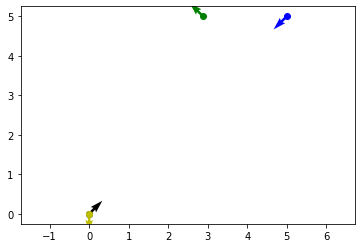

In [8]:
initial_orientation = np.array([-1, -1])
initial_position = np.array([5, 5])

angular_movement = -math.pi/2
movement = np.array([1.5,1.5])

final_orientation = rotate(initial_orientation, angular_movement)
final_position = initial_position + rotate(movement, as_radian(initial_orientation) -math.pi/2 )

plt.plot(*initial_position, "ob")
plt.quiver(*initial_position,*initial_orientation, color='b')

plt.plot(*[0,0], "ok")
plt.quiver(*[0,0],*movement, color='k')

plt.plot(*[0,0], "oy")
plt.quiver(*[0,0],*as_vector(angular_movement), color='y')


plt.plot(*final_position, "og")
plt.quiver(*final_position,*final_orientation, color='g')




plt.axis('equal')

1.5707963267948966 90.0


(19.8, 24.2, 15.8, 20.2)

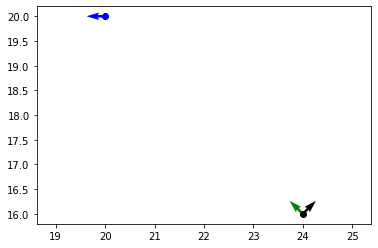

In [9]:
desired_point = np.array([ 20 , 20])
desired_orientation = np.array([ -1 , 0])
current_point = np.array([ 24 , 16])
#current_orientation = np.array([-1, -1])4
current_orientation = np.array([1, 1])
#current_orientation = np.array([0, 1])
#current_orientation = np.array([-1, 0])
#current_orientation = np.array([1, 0])
#current_orientation = np.array([1, -1])


plt.plot(*desired_point, "ob")
plt.quiver(*desired_point,*desired_orientation, color='b')
plt.plot(*current_point, "ok")
plt.quiver(*current_point,*current_orientation, color='k')

error_vector = desired_point - current_point
fix_force = math.sqrt(sum(error_vector**2))
fix_angle = error_vector / max(error_vector)


plt.quiver(*current_point, *fix_angle, color='g')

angle_error = near_radian(as_radian(fix_angle) - as_radian(current_orientation))


print(angle_error, angle_error * 180. / math.pi)
plt.axis('equal')
